In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Preprocessing**

In [42]:
df = pd.read_csv('/content/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [43]:
df.drop(['Cabin','Name', 'Embarked', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.0,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.0,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.0,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.0,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.0,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292


In [46]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
dtype: int64

In [47]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [48]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [49]:
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [50]:
df.to_csv('Processed_data.csv', index=False)

# **Model Building**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [52]:
data = pd.read_csv('/content/Processed_data.csv')
Train = data.drop(['Survived'], axis=1)
Test = data.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

**Accuracy and Confusion Matrix**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize variables to store accuracies
accuracies = {}

# Iterate over classifiers
for clf_name, clf in classifiers.items():
    # Train classifier
    clf.fit(x_train, y_train)

    # Predict on test set
    y_pred = clf.predict(x_test)

    # Calculate accuracy
    acc = accuracy_score(y_pred, y_test)

    # Store accuracy in dictionary
    accuracies[clf_name] = acc

# Print accuracies
for clf_name, acc in accuracies.items():
    print(f'{clf_name} accuracy: {acc*100:.2f}%')


Logistic Regression accuracy: 92.86%
Decision Tree accuracy: 100.00%
SVM accuracy: 72.62%
Naive Bayes accuracy: 100.00%
K-Nearest Neighbors accuracy: 84.52%
Random Forest accuracy: 100.00%
Gradient Boosting accuracy: 100.00%


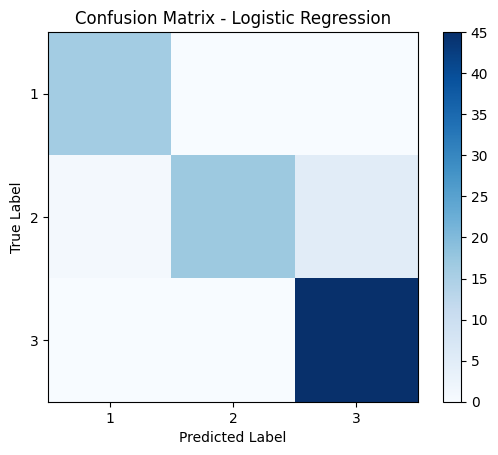

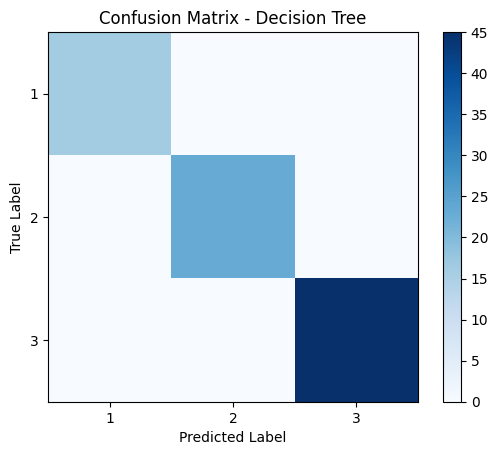

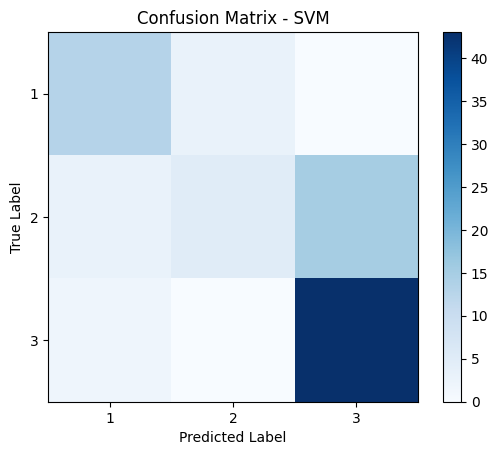

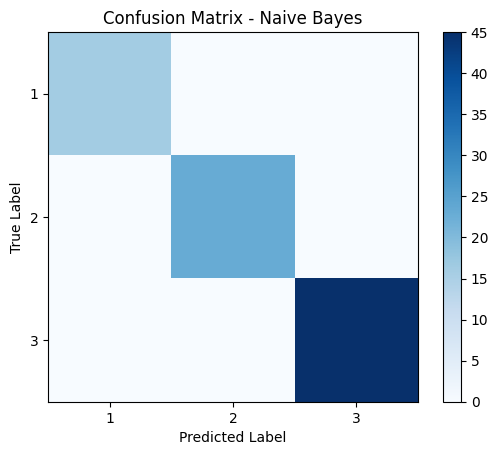

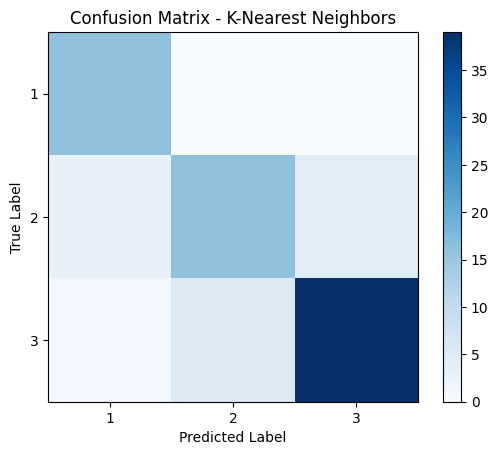

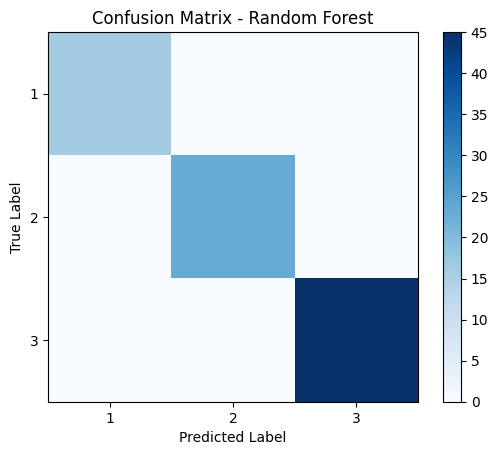

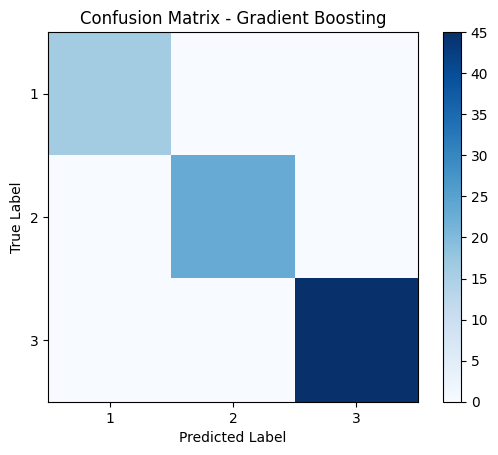

Logistic Regression accuracy: 92.86%
Decision Tree accuracy: 100.00%
SVM accuracy: 72.62%
Naive Bayes accuracy: 100.00%
K-Nearest Neighbors accuracy: 84.52%
Random Forest accuracy: 100.00%
Gradient Boosting accuracy: 100.00%


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize variables to store accuracies and confusion matrices
accuracies = {}
conf_matrices = {}

# Iterate over classifiers
for clf_name, clf in classifiers.items():
    # Train classifier
    clf.fit(x_train, y_train)

    # Predict on test set
    y_pred = clf.predict(x_test)

    # Calculate accuracy
    acc = accuracy_score(y_pred, y_test)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store accuracy and confusion matrix
    accuracies[clf_name] = acc
    conf_matrices[clf_name] = conf_matrix

    # Plot confusion matrix
    plt.figure()
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Print accuracies
for clf_name, acc in accuracies.items():
    print(f'{clf_name} accuracy: {acc*100:.2f}%')


**Cross-validation and Final Model Selection**

In [57]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define top three models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier()
}

# Assuming x_train, x_test, y_train, y_test are defined from previous steps

# Cross-validation to evaluate models
for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, x_train, y_train, cv=5)  # Adjust cv value as needed

    # Print cross-validation results
    print(f'{model_name} Cross-validation scores: {scores}')
    print(f'{model_name} Average Cross-validation accuracy: {scores.mean()*100:.2f}%')

# Select the best model based on cross-validation scores
best_model_name = max(models, key=lambda k: cross_val_score(models[k], x_train, y_train, cv=5).mean())
best_model = models[best_model_name]

# Train the best model on the entire dataset
best_model.fit(x_train, y_train)

# Predict on the test set or new data
y_pred = best_model.predict(x_test)

# Print final accuracy on test set (if available)
final_accuracy = accuracy_score(y_test, y_pred)
print(f'Final Accuracy on Test Set: {final_accuracy*100:.2f}%')

# Export results to CSV
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('Predicted_survival_results.csv', index=False)

# Print final dataset with survival vs predicted survival
print(results)


Decision Tree Cross-validation scores: [1. 1. 1. 1. 1.]
Decision Tree Average Cross-validation accuracy: 100.00%
Naive Bayes Cross-validation scores: [1. 1. 1. 1. 1.]
Naive Bayes Average Cross-validation accuracy: 100.00%
Random Forest Cross-validation scores: [1. 1. 1. 1. 1.]
Random Forest Average Cross-validation accuracy: 100.00%
Final Accuracy on Test Set: 100.00%
     Actual  Predicted
358       3          3
164       2          2
17        3          3
67        1          1
4         3          3
..      ...        ...
327       1          1
407       1          1
325       3          3
81        1          1
277       2          2

[84 rows x 2 columns]
